<a href="https://colab.research.google.com/github/AishaHarbi/Heart-Disease-classifier/blob/main/DATA_PREPROCESSING_SENIOR_DESIGN_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MySQL Connection 

### Import necessary packages: mysql.connector and pandas for tables manipulation

In [ ]:
!pip3 install mysql-connector

In [ ]:
import mysql.connector
import pandas as pd

### Connect to the database via the user, password, host, and database name

In [ ]:
USER = 'u786735017_aisha'
PASSWORD = '2r!IV+yTz'
HOST = 'sql242.main-hosting.eu'
DATABASE_NAME = 'u786735017_HDclassifier'

In [ ]:
cnx = mysql.connector.connect(user=USER, password=PASSWORD,
                              host=HOST,
                              database=DATABASE_NAME)

In [ ]:
cursor = cnx.cursor()

### Fetch local data 

In [ ]:
cursor.execute('SELECT * FROM `local_data_all_set`')

In [ ]:
LOCAL_DATA = cursor.fetchall()

#read the output into a dataframe 
LOCAL_DF = pd.DataFrame(LOCAL_DATA)


In [ ]:
LOCAL_DF

,0,1,2,3,4,5,6,7,8,9
0,36.4,130/80,71,,155,95,99,Cardiomyopathy,506852,
1,36.4,130/80,71,,155,95,99,Cardiomyopathy,506852,
2,36.8,140/90,58,,150,117,97,"Chest pain, unspecified - Atrial fibrillation ...",508229,positive
3,36.8,140/90,58,,150,117,97,Cardiomyopathy,508229,postive
4,36.0,110/80,85,M,174,108,99,Dilated cardiomyopathy,512931,
5,36.0,110/80,85,M,174,108,99,Dilated cardiomyopathy,512931,
6,37.0,100/60,96,,150,70,98,Cardiomyopathy - Essential (primary) hypertension,515783,
7,37.0,100/60,96,,150,70,98,Cardiomyopathy,515783,
8,36.5,150/80,76,M,163,77,97,Anaemia in chronic diseases classified elsewhe...,516135,
9,36.5,150/80,76,M,163,77,97,Ischaemic cardiomyopathy,516135,


### rename column header 

In [ ]:
LOCAL_DF.columns = ['Temprature','BP','Blood (hematocrit)','Gender','Height','Weight','SAO2',
                   'Target','ID','Chest pain']

In [ ]:
LOCAL_DF

,Temprature,BP,Blood (hematocrit),Gender,Height,Weight,SAO2,Target,ID,Chest pain
0,36.4,130/80,71,,155,95,99,Cardiomyopathy,506852,
1,36.4,130/80,71,,155,95,99,Cardiomyopathy,506852,
2,36.8,140/90,58,,150,117,97,"Chest pain, unspecified - Atrial fibrillation ...",508229,positive
3,36.8,140/90,58,,150,117,97,Cardiomyopathy,508229,postive
4,36.0,110/80,85,M,174,108,99,Dilated cardiomyopathy,512931,
5,36.0,110/80,85,M,174,108,99,Dilated cardiomyopathy,512931,
6,37.0,100/60,96,,150,70,98,Cardiomyopathy - Essential (primary) hypertension,515783,
7,37.0,100/60,96,,150,70,98,Cardiomyopathy,515783,
8,36.5,150/80,76,M,163,77,97,Anaemia in chronic diseases classified elsewhe...,516135,
9,36.5,150/80,76,M,163,77,97,Ischaemic cardiomyopathy,516135,


Back to local data: 

- delete duplicate rows
- target column as 1 since the local dataset contains only positive category (HD patients).
- Convert data-type to integer 
- Delete uncommon attributes. 
- Rename common attributes. 
- MERGE 

In [ ]:
LOCAL_DF['Target'] = 1 #target column as 1 since the local dataset contains only positive category (HD patients)

In [ ]:
LOCAL_DF

,Temprature,BP,Blood (hematocrit),Gender,Height,Weight,SAO2,Target,ID,Chest pain
0,36.4,130/80,71,,155,95,99,1,506852,
1,36.4,130/80,71,,155,95,99,1,506852,
2,36.8,140/90,58,,150,117,97,1,508229,positive
3,36.8,140/90,58,,150,117,97,1,508229,postive
4,36.0,110/80,85,M,174,108,99,1,512931,
5,36.0,110/80,85,M,174,108,99,1,512931,
6,37.0,100/60,96,,150,70,98,1,515783,
7,37.0,100/60,96,,150,70,98,1,515783,
8,36.5,150/80,76,M,163,77,97,1,516135,
9,36.5,150/80,76,M,163,77,97,1,516135,


In [ ]:
LOCAL_DF['Chest pain'].iloc[3] = 'positive' #re-correct the spelling of positive 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
LOCAL_DF['Chest pain'].iloc[3] == LOCAL_DF['Chest pain'].iloc[2] #make them same spelling 

False

In [ ]:
LOCAL_DF

,Temprature,BP,Blood (hematocrit),Gender,Height,Weight,SAO2,Target,ID,Chest pain
0,36.4,130/80,71,,155,95,99,1,506852,
1,36.4,130/80,71,,155,95,99,1,506852,
2,36.8,140/90,58,,150,117,97,1,508229,positive
3,36.8,140/90,58,,150,117,97,1,508229,positive
4,36.0,110/80,85,M,174,108,99,1,512931,
5,36.0,110/80,85,M,174,108,99,1,512931,
6,37.0,100/60,96,,150,70,98,1,515783,
7,37.0,100/60,96,,150,70,98,1,515783,
8,36.5,150/80,76,M,163,77,97,1,516135,
9,36.5,150/80,76,M,163,77,97,1,516135,


In [ ]:
LOCAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Temprature          42 non-null     object
 1   BP                  42 non-null     object
 2   Blood (hematocrit)  42 non-null     int64 
 3   Gender              42 non-null     object
 4   Height              42 non-null     int64 
 5   Weight              42 non-null     int64 
 6   SAO2                42 non-null     int64 
 7   Target              42 non-null     int64 
 8   ID                  42 non-null     int64 
 9   Chest pain          42 non-null     object
dtypes: int64(6), object(4)
memory usage: 3.4+ KB


In [ ]:
LOCAL_DF.drop_duplicates(inplace=True) #drop duplicate rows

In [ ]:
LOCAL_DF.reset_index(inplace=True) #reset index 

In [ ]:
LOCAL_DF.drop('index',axis=1,inplace=True) #drop old index 

In [ ]:
LOCAL_DF

,Temprature,BP,Blood (hematocrit),Gender,Height,Weight,SAO2,Target,ID,Chest pain
0,36.4,130/80,71,,155,95,99,1,506852,
1,36.8,140/90,58,,150,117,97,1,508229,positive
2,36.8,140/90,58,,150,117,97,1,508229,positive
3,36.0,110/80,85,M,174,108,99,1,512931,
4,37.0,100/60,96,,150,70,98,1,515783,
5,36.5,150/80,76,M,163,77,97,1,516135,
6,37.0,120/80,75,,150,95,98,1,518822,
7,37.1,160/100,109,,172,82,98,1,520082,
8,37.0,90/70,72,,150,80,99,1,521838,
9,37.5,130/80,81,M,150,94,98,1,526563,


Common attributes are: ["Chest pain","Resting blood pressure","target","sex"], include common atrributes ONLY

In [ ]:
LOCAL_DF = LOCAL_DF[["Chest pain","BP","Target","Gender"]]

Rename common attributes same as global 

In [ ]:
LOCAL_DF.columns = ["chest pain","trestbps","target","sex"]

Replace the categorical value 'M' to 1 (since in global data we have male = 1 and female = 0)

In [ ]:
LOCAL_DF['sex'] = LOCAL_DF['sex'].replace('M',1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For chest pain in global data we have 4 types: 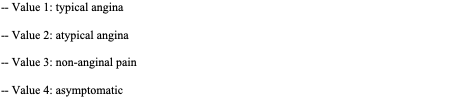


but in the local data we have only one undefined type of chest pain, so we decided to make it type 5: general chest pain 

In [ ]:
#LOCAL_DF['Chest pain'] = LOCAL_DF['Chest pain'].replace('positive',5)

In [ ]:
LOCAL_DF['chest pain'] = LOCAL_DF['chest pain'].replace('positive ',5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
LOCAL_DF['trestbps'] = [130,140,140,110,100,150,120,160,90,130,90,160,120,120,130,110,120,140,110,110,120,90] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for L in LOCAL_DF.columns: 
  LOCAL_DF[L] = pd.to_numeric(LOCAL_DF[L],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
LOCAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chest pain  1 non-null      float64
 1   trestbps    22 non-null     int64  
 2   target      22 non-null     int64  
 3   sex         6 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 832.0 bytes


### Fetch global data
#### SWISS DATA 

In [ ]:

cursor.execute('SELECT * FROM `Swis_global`')

In [ ]:
SWISS_GLOBAL_DATA = cursor.fetchall()

#read the output into a dataframe 
SWISS_GLOBAL_DF = pd.DataFrame(SWISS_GLOBAL_DATA)



In [ ]:
SWISS_GLOBAL_DF 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95,0,?,0,127,0,0.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,0.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


### rename columns header 

In [ ]:
SWISS_GLOBAL_DF.columns = ['age','sex','chest pain','trestbps','chol','fbs','restECG','thalach','exang','oldpeak'
                   ,'slope','ca','thal','target']



In [ ]:
SWISS_GLOBAL_DF

,age,sex,chest pain,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95,0,?,0,127,0,0.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,0.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


#### CLEAVELAND DATA 

In [ ]:
cursor.execute('SELECT * FROM `Cleveland_global`')

In [ ]:
CLEAVELAND_GLOBAL_DATA = cursor.fetchall()

#read the output into a dataframe 
CLEAVELAND_GLOBAL_DF = pd.DataFrame(CLEAVELAND_GLOBAL_DATA)




In [ ]:
CLEAVELAND_GLOBAL_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,Sex,Chest pain,"?resting blood pressure?,cholestor",fasting blood sugar,,,,,,,,,NaN
1,63,1,1,145,233,1,2,150,0,2.,3,0,6,0.0
2,67,1,4,160,286,0,2,108,1,1.,2,3,3,2.0
3,67,1,4,120,229,0,2,129,1,2.,2,2,7,1.0
4,37,1,3,130,250,0,0,187,0,3.,3,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.,2,0,7,1.0
300,68,1,4,144,193,1,0,141,0,3.,2,2,7,2.0
301,57,1,4,130,131,0,0,115,1,1.,2,1,7,3.0
302,57,0,2,130,236,0,2,174,0,0,2,1,3,1.0


### Rename columns header 

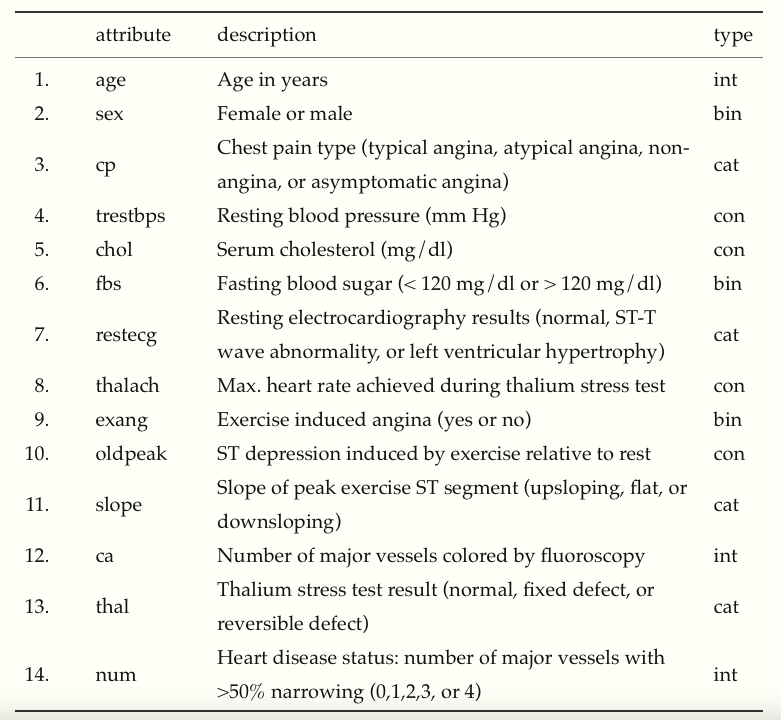

**To gain some insight into the power of these attributes to discriminate between disease (num>0) and no disease (num=0) num is `the tagret attribute`** 

In [ ]:
CLEAVELAND_GLOBAL_DF.columns = ['age','sex','chest pain','trestbps','chol','fbs','restECG','thalach','exang','oldpeak'
                   ,'slope','ca','thal','target']

In [ ]:
CLEAVELAND_GLOBAL_DF

,age,sex,chest pain,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,target
0,,Sex,Chest pain,"?resting blood pressure?,cholestor",fasting blood sugar,,,,,,,,,NaN
1,63,1,1,145,233,1,2,150,0,2.,3,0,6,0.0
2,67,1,4,160,286,0,2,108,1,1.,2,3,3,2.0
3,67,1,4,120,229,0,2,129,1,2.,2,2,7,1.0
4,37,1,3,130,250,0,0,187,0,3.,3,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.,2,0,7,1.0
300,68,1,4,144,193,1,0,141,0,3.,2,2,7,2.0
301,57,1,4,130,131,0,0,115,1,1.,2,1,7,3.0
302,57,0,2,130,236,0,2,174,0,0,2,1,3,1.0


In [ ]:
#delete first row 
CLEAVELAND_GLOBAL_DF = CLEAVELAND_GLOBAL_DF.iloc[1:]

In [ ]:
CLEAVELAND_GLOBAL_DF

,age,sex,chest pain,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,1,145,233,1,2,150,0,2.,3,0,6,0.0
2,67,1,4,160,286,0,2,108,1,1.,2,3,3,2.0
3,67,1,4,120,229,0,2,129,1,2.,2,2,7,1.0
4,37,1,3,130,250,0,0,187,0,3.,3,0,3,0.0
5,41,0,2,130,204,0,2,172,0,1.,1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.,2,0,7,1.0
300,68,1,4,144,193,1,0,141,0,3.,2,2,7,2.0
301,57,1,4,130,131,0,0,115,1,1.,2,1,7,3.0
302,57,0,2,130,236,0,2,174,0,0,2,1,3,1.0


### merge global data (Swiss + Cleavland) 

Show the datatype of each co

In [ ]:
for m in CLEAVELAND_GLOBAL_DF.columns: 
  CLEAVELAND_GLOBAL_DF[m] = pd.to_numeric(CLEAVELAND_GLOBAL_DF[m],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
CLEAVELAND_GLOBAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   chest pain  303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restECG     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          299 non-null    float64
 12  thal        301 non-null    float64
 13  target      303 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [ ]:
for c in SWISS_GLOBAL_DF.columns: 
  SWISS_GLOBAL_DF[c] = pd.to_numeric(SWISS_GLOBAL_DF[c],errors='coerce')

In [ ]:
SWISS_GLOBAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         123 non-null    int64  
 1   sex         123 non-null    int64  
 2   chest pain  123 non-null    int64  
 3   trestbps    121 non-null    float64
 4   chol        123 non-null    int64  
 5   fbs         48 non-null     float64
 6   restECG     122 non-null    float64
 7   thalach     122 non-null    float64
 8   exang       122 non-null    float64
 9   oldpeak     117 non-null    float64
 10  slope       106 non-null    float64
 11  ca          5 non-null      float64
 12  thal        71 non-null     float64
 13  target      123 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 13.6 KB


In [ ]:
GLOBAL_MERGED_DF = pd.concat([SWISS_GLOBAL_DF,CLEAVELAND_GLOBAL_DF])

In [ ]:
GLOBAL_MERGED_DF 

,age,sex,chest pain,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3.0
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110.0,264,0.0,0.0,132.0,0.0,1.0,2.0,0.0,7.0,1.0
300,68,1,4,144.0,193,1.0,0.0,141.0,0.0,3.0,2.0,2.0,7.0,2.0
301,57,1,4,130.0,131,0.0,0.0,115.0,1.0,1.0,2.0,1.0,7.0,3.0
302,57,0,2,130.0,236,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [ ]:
LOCAL_GLOBAL_MERGED_DF = pd.concat([GLOBAL_MERGED_DF,LOCAL_DF])

In [ ]:
LOCAL_GLOBAL_MERGED_DF.head()


,age,sex,chest pain,trestbps,chol,fbs,restECG,thalach,exang,oldpeak,slope,ca,thal,target
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3.0
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0


In [ ]:
LOCAL_GLOBAL_MERGED_DF.isna().sum()

age            22
sex            16
chest pain     21
trestbps        2
chol           22
fbs            97
restECG        23
thalach        23
exang          23
oldpeak        28
slope          39
ca            144
thal           76
target          0
dtype: int64

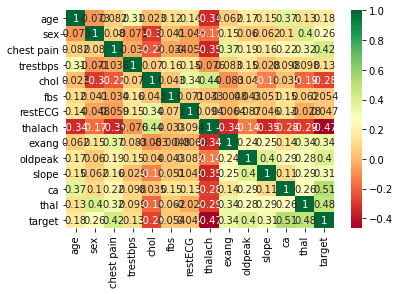

In [ ]:
import seaborn as sns
import matplotlib as plt
#get correlations of each features in dataset
corrmat = LOCAL_GLOBAL_MERGED_DF.corr()
top_corr_features = corrmat.index

#plot heat map
g=sns.heatmap(LOCAL_GLOBAL_MERGED_DF[top_corr_features].corr(),annot=True,cmap="RdYlGn")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50cb04eb50>,
      dtype=object)

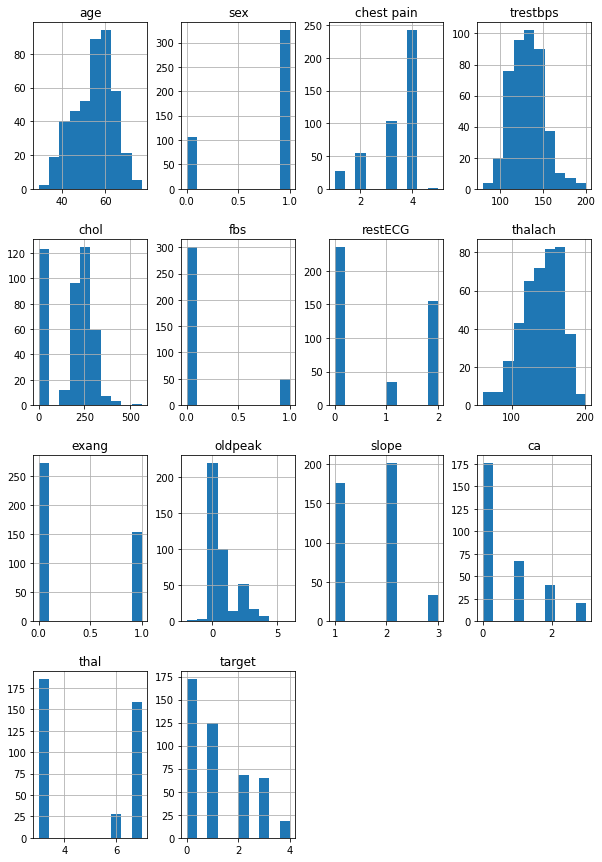

In [ ]:

LOCAL_GLOBAL_MERGED_DF.hist(figsize=(10,15))


In [ ]:
from sklearn.model_selection import train_test_split

#3 sets: 60% training, 20% validation, 20% testing 
train_set, test_set = train_test_split(LOCAL_GLOBAL_MERGED_DF, test_size=0.2, random_state=42) #100%: 80% training 20% testing 
training_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=42) #80% of the data: 60% training, 20% validation 

In [ ]:
train_set.shape, test_set.shape

((358, 14), (90, 14))

In [ ]:
training_set.shape, validation_set.shape

((286, 14), (72, 14))

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def impute_data(data):
  tree = DecisionTreeRegressor(max_features='sqrt', random_state=0)
  imputer = IterativeImputer(estimator=tree, verbose=2, max_iter=21,tol=1e-10, imputation_order='ascending')
  return pd.DataFrame(imputer.fit_transform(data))

In [ ]:
training_set.isna().sum()

age           11
sex            7
chest pain    11
trestbps       1
chol          11
fbs           57
restECG       11
thalach       11
exang         11
oldpeak       14
slope         21
ca            87
thal          42
target         0
dtype: int64

In [ ]:
training_set_imputed = impute_data(training_set)

[IterativeImputer] Completing matrix with shape (286, 14)
[IterativeImputer] Ending imputation round 1/21, elapsed time 0.03
[IterativeImputer] Change: 269.4987292654515, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 2/21, elapsed time 0.05
[IterativeImputer] Change: 332.0, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 3/21, elapsed time 0.08
[IterativeImputer] Change: 341.3, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 4/21, elapsed time 0.10
[IterativeImputer] Change: 276.4, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 5/21, elapsed time 0.12
[IterativeImputer] Change: 324.8, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 6/21, elapsed time 0.14
[IterativeImputer] Change: 361.8, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputation round 7/21, elapsed time 0.17
[IterativeImputer] Change: 166.0, scaled tolerance: 3.6e-08 
[IterativeImputer] Ending imputati

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
training_set_imputed.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
training_set_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.0,1.0,0.0,3.0,0.0
1,70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.0,2.0,1.0,7.0,3.0
2,72.0,1.0,3.0,160.0,0.0,0.0,2.0,114.0,0.0,1.6,2.0,2.0,3.0,0.0
3,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,0.0,7.0,3.0
4,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,59.0,1.0,4.0,120.0,0.0,0.0,0.0,115.0,0.0,0.0,2.0,3.0,3.0,2.0
282,52.0,1.0,4.0,165.0,0.0,0.0,0.0,122.0,1.0,1.0,1.0,1.0,7.0,2.0
283,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1.0
284,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,2.0,3.0,1.0


In [ ]:
training_set_imputed.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
training_set_imputed['sex'][training_set_imputed['sex'] == 0] = 'female'
training_set_imputed['sex'][training_set_imputed['sex'] == 1] = 'male'

training_set_imputed['chest_pain_type'][training_set_imputed['chest_pain_type'] == 1] = 'typical angina'
training_set_imputed['chest_pain_type'][training_set_imputed['chest_pain_type'] == 2] = 'atypical angina'
training_set_imputed['chest_pain_type'][training_set_imputed['chest_pain_type'] == 3] = 'non-anginal pain'
training_set_imputed['chest_pain_type'][training_set_imputed['chest_pain_type'] == 4] = 'asymptomatic'
training_set_imputed['chest_pain_type'][training_set_imputed['chest_pain_type'] == 5] = 'general chest pain'


training_set_imputed['fasting_blood_sugar'][training_set_imputed['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
training_set_imputed['fasting_blood_sugar'][training_set_imputed['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

training_set_imputed['rest_ecg'][training_set_imputed['rest_ecg'] == 0] = 'normal'
training_set_imputed['rest_ecg'][training_set_imputed['rest_ecg'] == 1] = 'ST-T wave abnormality'
training_set_imputed['rest_ecg'][training_set_imputed['rest_ecg'] == 2] = 'left ventricular hypertrophy'

training_set_imputed['exercise_induced_angina'][training_set_imputed['exercise_induced_angina'] == 0] = 'no'
training_set_imputed['exercise_induced_angina'][training_set_imputed['exercise_induced_angina'] == 1] = 'yes'

training_set_imputed['st_slope'][training_set_imputed['st_slope'] == 1] = 'upsloping'
training_set_imputed['st_slope'][training_set_imputed['st_slope'] == 2] = 'flat'
training_set_imputed['st_slope'][training_set_imputed['st_slope'] == 3] = 'downsloping'


training_set_imputed['thalassemia'][training_set_imputed['thalassemia'] == 3] = 'normal'
training_set_imputed['thalassemia'][training_set_imputed['thalassemia'] == 6] = 'fixed defect'
training_set_imputed['thalassemia'][training_set_imputed['thalassemia'] == 7] = 'reversable defect'

training_set_imputed['target'][training_set_imputed['target']== 2] = 1
training_set_imputed['target'][training_set_imputed['target']== 3] = 1






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0

### check data-types

In [ ]:
training_set_imputed.dtypes

age                        float64
sex                         object
chest_pain_type             object
resting_blood_pressure     float64
cholesterol                float64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved    float64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels          float64
thalassemia                 object
target                     float64
dtype: object

### apply one-hot-encoding 

In [ ]:
training_set_imputed = pd.get_dummies(training_set_imputed)

In [ ]:
training_set_imputed.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'sex_female', 'sex_male', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina',
       'fasting_blood_sugar_greater than 120mg/ml',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')

In [ ]:
training_set_imputed.shape

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_greater than 120mg/ml,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,51.0,110.0,175.0,123.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0
1,70.0,160.0,269.0,112.0,2.0,1.0,1.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1
2,72.0,160.0,0.0,114.0,1.6,2.0,0.0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0
3,70.0,140.0,0.0,157.0,2.0,0.0,1.0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
4,52.0,138.0,223.0,169.0,0.0,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,59.0,120.0,0.0,115.0,0.0,3.0,1.0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0
282,52.0,165.0,0.0,122.0,1.0,1.0,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
283,59.0,174.0,249.0,143.0,0.0,0.0,1.0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0
284,73.0,160.0,0.0,121.0,0.0,2.0,1.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0
